_This notebook contains code and comments from Section 7.1 of the book [Ensemble Methods for Machine Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning). Please see the book for additional details on this topic. This notebook and code are released under the [MIT license](https://github.com/gkunapuli/ensemble-methods-notebooks/blob/master/LICENSE)._

## 7.1	Regression

### 7.1.1 Linear vs. Nonlinear Regression for Continuous Labels
Let's generate some univariate (one-dimensional) synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

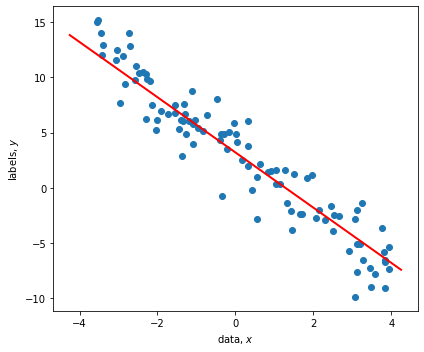

In [2]:
n = 100
X = np.random.uniform(low=-4.0, high=4.0, size=(n, 1))
f = lambda x: -2.5 * x + 3.2
y = f(X)  # Generate labels according to this nonlinear function
y += np.random.normal(scale=0.15 * np.max(y), size=(n, 1))

fig = plt.figure(figsize=(6, 5))
plt.scatter(X, y);

xTrue = np.linspace(start=-4.25, stop=4.25, num=100)
yTrue = f(xTrue)
plt.plot(xTrue, yTrue, c='r', linewidth=2)

plt.xlabel('data, $x$')
plt.ylabel('labels, $y$')
fig.tight_layout()
pngFile = './figures/CH07_F01_Kunapuli.png'
plt.savefig(pngFile, dpi=300, bbox_inches='tight', pad_inches=0)

Now, let's create a 2d data set from this 1d data set that contains correlations, that is one data column (or feature) depends on another. In this case, the second column is a multiple of the first (with some noise, of course).

In [3]:
# Split into training and test sets
X = np.concatenate([X, 3*X + 0.25*np.random.uniform(size=(n, 1))], axis=1)
from sklearn.model_selection import train_test_split
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.25)
print(X.shape, Xtrn.shape, Xtst.shape, ytrn.shape, ytst.shape)

(100, 2) (75, 2) (25, 2) (75, 1) (25, 1)


Train four different models to see how they fit this synthetic dataset with correlations:
* Ordinary least squares regression
* Ridge regression 
* LASSO
* Elastic Net

**Listing 7.1**: Linear regression models

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
models = ['OLS Regression', 'Ridge Regression', 'LASSO', 'Elastic Net']
regressors = [LinearRegression(),
              Ridge(alpha=2.0),
              Lasso(alpha=2.0),
              ElasticNet(alpha=2.0, l1_ratio=0.5)]

for (model, regressor) in zip(models, regressors):
    regressor.fit(Xtrn, ytrn)
    ypred = regressor.predict(Xtst)        # Get predictions on the test set
    mse = mean_squared_error(ytst, ypred)  # Compute the test error using MSE as the metric
    mad = mean_absolute_error(ytst, ypred)

    print('{0}\'s test set performance: MSE = {1:4.3f}, MAD={2:4.3f}'.format(model, mse, mad))
    print('{0} model: {1} * x + {2}\n'.format(model, regressor.coef_, regressor.intercept_))

OLS Regression's test set performance: MSE = 4.305, MAD=1.700
OLS Regression model: [[11.59889806 -4.73207472]] * x + [3.81481568]

Ridge Regression's test set performance: MSE = 4.080, MAD=1.679
Ridge Regression model: [[-0.03488868 -0.85549649]] * x + [3.30711915]

LASSO's test set performance: MSE = 4.536, MAD=1.787
LASSO model: [-0.         -0.81768709] * x + [3.29024051]

Elastic Net's test set performance: MSE = 4.483, MAD=1.776
Elastic Net model: [-0.         -0.82213406] * x + [3.2918958]



Nonlinear Regression examples: Decision Trees and Artificial Neural Networks (multilayer perceptrons)

Decision Trees test set performance: MSE = 0.042, MAD=0.171
Neural Networks test set performance: MSE = 0.023, MAD=0.128


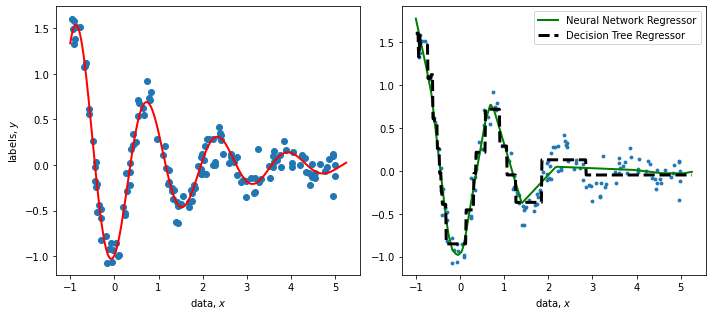

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# Generate and visualize data
n = 150
X = np.random.uniform(low=-1.0, high=5.0, size=(n, 1))
g = lambda x: np.exp(-0.5*x) * np.sin(1.25 * np.pi * x - 1.414)
y = g(X)  # Generate labels according to this nonlinear function
y += np.random.normal(scale=0.08 * np.max(y), size=(n, 1))  
y = y.reshape(-1, )

xTrue = np.linspace(start=-1, stop=5.25, num=500)
yTrue = g(xTrue)
ax[0].plot(xTrue, yTrue, c='r', linewidth=2)
ax[0].scatter(X, y);
ax[0].set_xlabel('data, $x$')
ax[0].set_ylabel('labels, $y$')
fig.tight_layout()

# Split into train and test sets
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.25)

# Train nonlinear classifiers
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(Xtrn, ytrn)
ypred_dt = dt.predict(Xtst)
mse = mean_squared_error(ytst, ypred_dt)
mad = mean_absolute_error(ytst, ypred_dt)
print('Decision Tree''s test set performance: MSE = {0:4.3f}, MAD={1:4.3f}'.format(mse, mad))

from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(hidden_layer_sizes=(50, 50, 50), alpha=0.001, max_iter=1000)
ann.fit(Xtrn, ytrn.reshape(-1, ))
ypred_ann = ann.predict(Xtst)
mse = mean_squared_error(ytst, ypred_ann)
mad = mean_absolute_error(ytst, ypred_ann)
print('Neural Network''s test set performance: MSE = {0:4.3f}, MAD={1:4.3f}'.format(mse, mad))

ax[1].scatter(X, y, s=8);
ax[1].plot(xTrue, ann.predict(xTrue.reshape(-1, 1)), c='g', linewidth=2, linestyle='-')
ax[1].plot(xTrue, dt.predict(xTrue.reshape(-1, 1)), c='k', linewidth=3, linestyle='--')
ax[1].set_xlabel('data, $x$')
ax[1].legend(['Neural Network Regressor', 'Decision Tree Regressor'])
fig.tight_layout()
# pngFile = './figures/CH07_F02_Kunapuli.png'
# plt.savefig(pngFile, dpi=300, bbox_inches='tight', pad_inches=0)

### 7.1.2 Poisson Regression for Count Labels

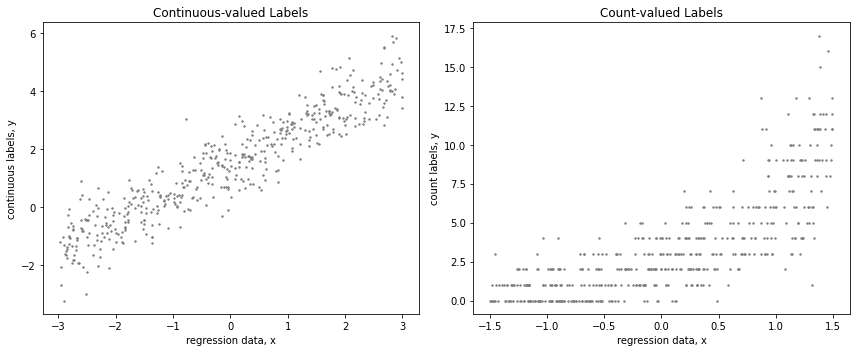

In [6]:
# Plot continuous vs. count data
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Generate continuous labels and some distributions
n = 500
X = np.random.uniform(low=-3.0, high=3.0, size=(n, 1))
f = lambda x: x + 1.5
y = f(X)  # Generate labels according to this nonlinear function
y += np.random.normal(scale=0.15 * np.max(y), size=(n, 1))
ax[0].scatter(X, y, s=2, c='grey');
# xTrue = np.linspace(start=-3.05, stop=3.05, num=100)
# yTrue = f(xTrue)
# ax[0].plot(xTrue, yTrue, c='grey', linewidth=2, linestyle='--')
ax[0].set_xlabel('regression data, x')
ax[0].set_ylabel('continuous labels, y')
ax[0].set_title('Continuous-valued Labels')

# Generate count labels and some distributions
n = 500
X = np.random.uniform(low=-1.5, high=1.5, size=(n, 1))
f = lambda x: x + 0.8
mu = np.exp(f(X))
y = np.random.poisson(lam=mu, size=(n, 1))
ax[1].scatter(X, y, s=2, c='grey');
# xTrue = np.linspace(start=-1.55, stop=1.55, num=100)
# yTrue = f(xTrue)
# ax[1].plot(xTrue, np.exp(yTrue), c='grey', linewidth=2, linestyle='--')
ax[1].set_xlabel('regression data, x')
ax[1].set_ylabel('count labels, y')
ax[1].set_title('Count-valued Labels')

fig.tight_layout()
pngFile = './figures/CH07_F03_Kunapuli.png'
plt.savefig(pngFile, dpi=300, bbox_inches='tight', pad_inches=0)

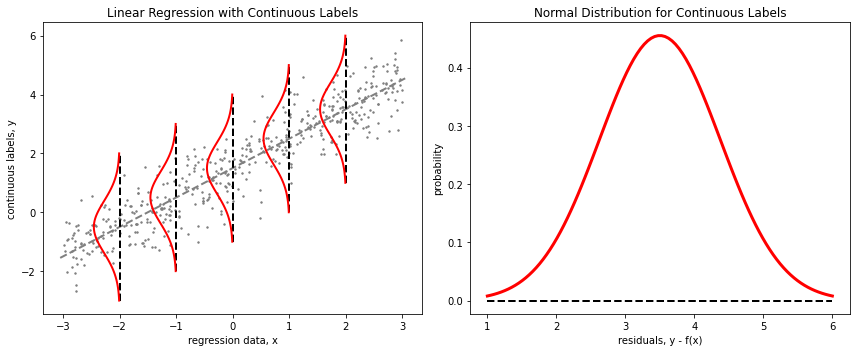

In [7]:
from scipy.stats import norm

# Initialize plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Generate continuous labels and some distributions
n = 500
X = np.random.uniform(low=-3.0, high=3.0, size=(n, 1))
f = lambda x: x + 1.5
y = f(X)  # Generate labels according to this nonlinear function
y += np.random.normal(scale=0.15 * np.max(y), size=(n, 1))

ax[0].scatter(X, y, s=2, c='grey');

xTrue = np.linspace(start=-3.05, stop=3.05, num=100)
yTrue = f(xTrue)
ax[0].plot(xTrue, yTrue, c='grey', linewidth=2, linestyle='--')

mu = scale=0.15 * np.max(y)
for x in np.arange(-2, 3, 1):
    yy = np.linspace(f(x)-2.5,  f(x) + 2.5, num=100)
    xx = np.full((100, ), x) - norm.pdf(yy, f(x), mu)
    ax[0].plot(np.full((100, ), x), yy, c='k', linewidth=2, linestyle='--')
    ax[0].plot(xx, yy, c='r', linewidth=2, linestyle='-')
ax[0].set_xlabel('regression data, x')
ax[0].set_ylabel('continuous labels, y')
# ax[0].scatter(2 - norm.pdf(f(2), f(2), mu), f(2), s=50, c='g')
ax[0].set_title('Linear Regression with Continuous Labels')

xx = np.linspace(f(2)-2.5,  f(2) + 2.5, num=100)
yy = norm.pdf(xx, f(2), mu)
ax[1].plot(xx, yy, linestyle='-', c='r', linewidth=3)
ax[1].plot(xx, np.full((len(xx), ), 0.0), linestyle='--', c='k', linewidth=2)
ax[1].set_xlabel('residuals, y - f(x)')
ax[1].set_ylabel('probability')
ax[1].set_title('Normal Distribution for Continuous Labels')
# ax[1].scatter(f(2), norm.pdf(f(2), f(2), mu), s=50, c='g')

fig.tight_layout()
pngFile = './figures/CH07_F04_Kunapuli.png'
plt.savefig(pngFile, dpi=300, bbox_inches='tight', pad_inches=0)

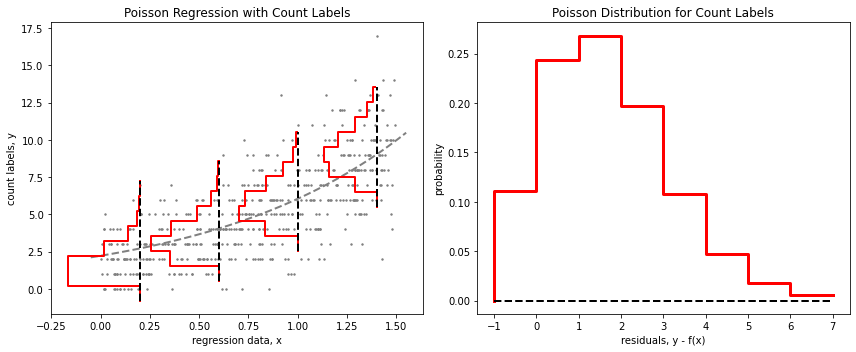

In [8]:
from scipy.stats import poisson

# Initialize plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Generate count labels and some distributions
n = 500
X = np.random.uniform(low=0.0, high=1.5, size=(n, 1))
f = lambda x: x + 0.8
mu = np.exp(f(X))
y = np.random.poisson(lam=mu, size=(n, 1))

ax[0].scatter(X, y, s=2, c='grey');

xTrue = np.linspace(start=-0.05, stop=1.55, num=100)
yTrue = f(xTrue)
ax[0].plot(xTrue, np.exp(yTrue), c='grey', linewidth=2, linestyle='--')

x = 0.5
for x in [0.2, 0.6, 1.0, 1.4]:
    xx = np.arange(-1, 8)
    dist = poisson(f(x))
    yy = -dist.pmf(xx) + x
    ax[0].step(yy, xx + np.exp(f(x)) - 2.5, linewidth=2, c='r')
    ax[0].plot(np.full((len(xx), ), x), xx + np.exp(f(x)) - 2.5, c='k', linewidth=2, linestyle='--')
    
ax[0].set_xlabel('regression data, x')
ax[0].set_ylabel('count labels, y')
ax[0].set_title('Poisson Regression with Count Labels')

xx = np.arange(-1, 8)
dist = poisson(f(1.4))
yy = dist.pmf(xx)
    
ax[1].step(xx, yy, linestyle='-', c='r', linewidth=3)
ax[1].plot(xx, np.full((len(xx), ), 0.0), linestyle='--', c='k', linewidth=2)
ax[1].set_xlabel('residuals, y - f(x)')
ax[1].set_ylabel('probability')
ax[1].set_title('Poisson Distribution for Count Labels')

fig.tight_layout()
pngFile = './figures/CH07_F05_Kunapuli.png'
plt.savefig(pngFile, dpi=300, bbox_inches='tight', pad_inches=0)

In [9]:
# Split into training and test sets
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y.reshape(-1, ), test_size=0.25)

# Train a Poisson regressor
from sklearn.linear_model import PoissonRegressor

poiss_reg = PoissonRegressor(alpha=0.01)
poiss_reg.fit(Xtrn, ytrn)
ypred = poiss_reg.predict(Xtst)
mse = mean_squared_error(ytst, ypred)  # Compute the test error using MSE as the metric
mad = mean_absolute_error(ytst, ypred)
print('Poisson regression test set performance: MSE = {0:4.3f}, MAD={1:4.3f}'.format(mse, mad))

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(Xtrn, ytrn)
ypred = ridge_reg.predict(Xtst)
mse = mean_squared_error(ytst, ypred)  # Compute the test error using MSE as the metric
mad = mean_absolute_error(ytst, ypred)
print('Ridge regression test set performance: MSE = {0:4.3f}, MAD={1:4.3f}'.format(mse, mad))

Poisson regression test set performance: MSE = 3.963, MAD=1.594
Ridge regression test set performance: MSE = 4.219, MAD=1.610


### 7.1.3 Logistic Regression for Categorical Labels

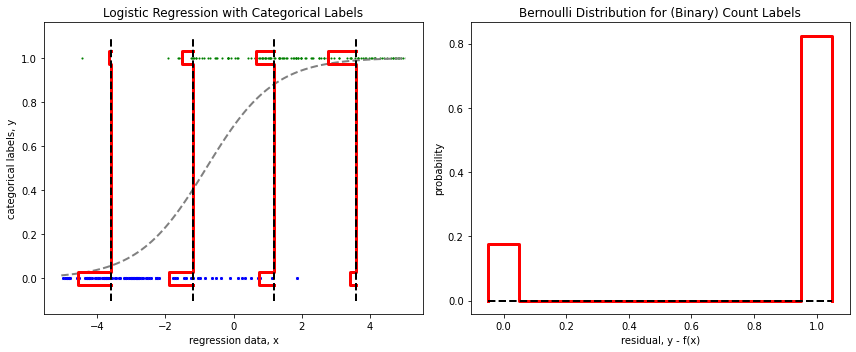

In [10]:
from scipy.stats import bernoulli

# Initialize plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Generate count labels and some distributions
n = 200
X = np.random.uniform(low=-5, high=5, size=(n, 1))
f = lambda x: x + 0.8
mu = np.exp(f(X) / (1- f(X)))
p = 1 / (1 + np.exp(-f(X)))
y = np.random.binomial(1, p, size=(n, 1))


ax[0].scatter(X[y==0], y[y==0], s=5, c='b', marker='x');
ax[0].scatter(X[y==1], y[y==1], s=5, c='g', marker='.');

xTrue = np.linspace(start=-5.05, stop=5.05, num=100)
yTrue = f(xTrue)
ax[0].plot(xTrue, 1 / (1 + np.exp(-yTrue)), c='grey', linewidth=2, linestyle='--')

for x in [-3.6, -1.2, 1.2, 3.6]:
    th = 1 / (1 + np.exp(-x))
    pos = np.sum(p > th) / n
    xx = [x, x-pos, x-pos, x, x, x-1+pos, x-1+pos, x]
    yy = [-0.03, -0.03, 0.03, 0.03, 0.97, 0.97, 1.03, 1.03]    
    ax[0].plot(xx, yy, c='r', linewidth=3)
    ax[0].plot([x, x], [-0.1, 1.1], c='k', linewidth=2, linestyle='--')
    
ax[0].set_xlabel('regression data, x')
ax[0].set_ylabel('categorical labels, y')
ax[0].set_title('Logistic Regression with Categorical Labels')

xx = [-0.05, -0.05, 0.05, 0.05, 0.95, 0.95, 1.05, 1.05]
yy = [0, pos, pos, 0, 0, 1-pos, 1-pos, 0]
ax[1].step(xx, yy, linestyle='-', c='r', linewidth=3)
ax[1].plot(xx, np.full((len(xx), ), 0.0), linestyle='--', c='k', linewidth=2)
ax[1].set_xlabel('residual, y - f(x)')
ax[1].set_ylabel('probability')
ax[1].set_title('Bernoulli Distribution for (Binary) Count Labels')

fig.tight_layout()
pngFile = './figures/CH07_F06_Kunapuli.png'
plt.savefig(pngFile, dpi=300, bbox_inches='tight', pad_inches=0)